# 使用估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

## 載入套件

In [66]:
import numpy as np 

## 產生隨機資料

In [67]:
# 產生線性隨機資料100筆
from sklearn.datasets import make_regression
X_org, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_org.shape, y.shape

((100, 1), (100,))

In [68]:
# 設定 b 對應的 X，固定為 1
one=np.ones((X_org.shape[0], 1))
one.shape

(100, 1)

In [69]:
one[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [70]:
# X 結合 b 對應的 X
X=np.concatenate((X_org, one), axis=1)
X.shape

(100, 2)

## 估算簡單線性迴歸的參數(w、b)

In [71]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([45.78520483,  1.74767298])

## 驗算

In [72]:
# 迴歸
beta  = np.polyfit(X_org.reshape(-1), y, deg=1)
beta

array([45.78520483,  1.74767298])

## 顯示迴歸線

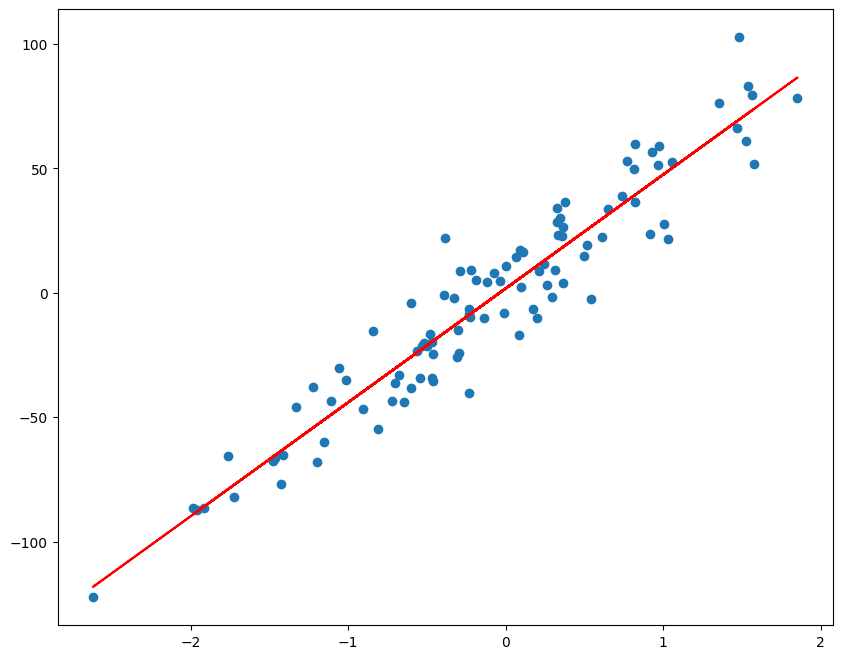

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], X[:, 0] * beta[0] + beta[1], 'r');

## 計程車費預測

In [74]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [76]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        dict1 = {}
        for i, category in enumerate(df[col].unique()):
            dict1[category]=i
        df.loc[:, col] = df[col].map(dict1)
    df[col] = df[col].astype(int)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16,1,0,0,0,0,2
1,10,1,1,0,0,0,3
2,21,3,1,0,0,0,3
3,23,3,1,0,0,0,2
4,24,3,0,0,0,0,4


In [77]:
X, y = df.drop('tip', axis=1).values, df.tip

In [78]:
# 設定 b 對應的 X，固定為 1
one=np.ones((X.shape[0], 1))
one.shape

(244, 1)

In [79]:
# X 結合 b 對應的 X
X=np.concatenate((X, one), axis=1)
X.shape

(244, 7)

## 估算簡單線性迴歸的參數(w、b)

In [80]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([ 0.09482096, -0.02624759,  0.02891329, -0.01516258,  0.02900016,
        0.19874384,  0.38084062])

In [82]:
beta.shape, X.shape

((7,), (244, 7))

In [83]:
# MSE
from sklearn.metrics import mean_squared_error
y_pred = X @ beta
print(f'MSE = {mean_squared_error(y, y_pred)}') 

MSE = 1.0655313321921025


## 使用sklearn驗算

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

(array([ 0.09482096, -0.02624759,  0.02891329, -0.01516258,  0.02900016,
         0.19874384,  0.        ]),
 0.3808406211196127)

In [65]:
# MSE
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)
print(f'MSE = {mean_squared_error(y, y_pred)}') 

MSE = 1.0655313321921025
